Here we import necessary python packages which will be useful for the later part of the tutorial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt           
from sklearn import datasets              
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Diabetes Dataset
Here we go thourgh the machine learning pipeline with a relatively simple dataset called the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of `n = 442` diabetes patients. The response of interest, which is a quantitative measure of disease progression one year after baseline, is treated as the target that we want to predict.

We first look at the data itself. Notice that each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

In case you might be curious about the data type which use to present the following data, it is called [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is designed for presenting two-dimensional, size-mutable, potentially heterogeneous tabular data (e.g., a `csv` format file). This data type is good for data analysis, since the way it is presented is clear and there are many built-in functions that can be used; however, it is not optimal for being directly utilized in machine learning models.

In [2]:
diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True, as_frame=True)
print(f"Data type: {type(diabetes_data)}")
diabetes_data # DataFrame

Data type: <class 'pandas.core.frame.DataFrame'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


For calculation convenience, we use the data in [`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) format instead of [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). I recommend this [NumPy tutorial](https://cs231n.github.io/python-numpy-tutorial/) if you want to know more about it.

In [3]:
diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True, as_frame=False)
print(f"Data type: {type(diabetes_data)}")
diabetes_data

Data type: <class 'numpy.ndarray'>


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
print(f"Data shape: {diabetes_data.shape}")
print(f"Target shape: {diabetes_target.shape}")

Data shape: (442, 10)
Target shape: (442,)


## Training a Linear Model

Before training a model, we need to split the data into a <u>training set</u> and a <u>test set</u>. After all, we do want our model to have some ability to generalize. What we going to do is to train the model on the training set and test the performance of our model on the test set. Our goal is obtaining a model that can estimate the target value using the input features. 

We can directly use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Sklearn to split the dataset into training set and test set. I want to remind you about two things:

- Keep the parameter `shuffle` to `True` if you want the function to automatically shuffle the samples for you during the spliting.
- A fixed `random_state` can make sure that your dataset is shuffled in the same way each time you do it

In [6]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_data,
                                                                                        diabetes_target,
                                                                                        test_size=0.2,
                                                                                        shuffle=True,
                                                                                        random_state=42)
print(diabetes_X_test.shape)

(89, 10)


For simplicity, we only use one feature from the feature set to train the model.

In [7]:
print(diabetes_X_train[:, np.newaxis, 2].shape) # Only use the third feature for this task

(353, 1)


Now we want to train a model to predict the targets given the data. We first initialize a [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) model. Remember that we will learn more about this model later on in the course lecture, and now we are going to directly use it for the purpose of showing what a general machine learning pipeline looks like.

In [9]:
LinReg = LinearRegression() # We train the model using all the default settings

Then we train the model using the training data that we just splited. For now, we only use one feature to train the models, even if we have ten features in total.

In [10]:
selected_diabetes_X_train = diabetes_X_train[:, np.newaxis, 2]
selected_diabetes_X_test = diabetes_X_test[:, np.newaxis, 2]
selected_diabetes_X_test = diabetes_X_test[:, np.newaxis, 2]
LinReg.fit(selected_diabetes_X_train, diabetes_y_train)

LinearRegression()

After training the model, we use our model on the test set.

In [13]:
diabetes_y_pred = LinReg.predict(selected_diabetes_X_test)

To see how good our model did on the test set, we need a way to evaluate it. For example, we can use the **Mean Square Error (MSE)** to achieve this goal. Suppose that $y_i$ is the true value of the $i$-th sample, and $\hat{y}_i$ is the corresponding predicted value, then the MSE estimated over $n_{\text{samples}}$ is defined as:

$$
\text{MSE} (y, \hat{y}) = \frac{1}{n_{\text{samples}}}\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2
$$

In scikit-learn, the estimation can be achieved by using the function [`mean_square_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [14]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

4061.825928494928

This might not be straightforward enough. Instead, we can visualize the predicted results using [`matplotlib`](https://matplotlib.org/).

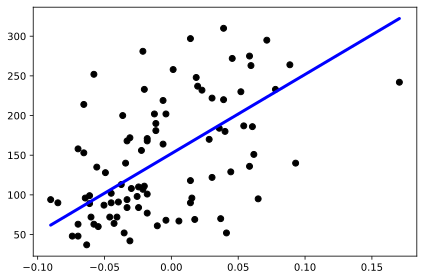

In [15]:
plt.scatter(selected_diabetes_X_test, diabetes_y_test, color="black")
plt.plot(selected_diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.tight_layout()
plt.show()

If we use all the features in the training data, what will happen?

In [16]:
LinReg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = LinReg.predict(diabetes_X_test)
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2900.1732878832318

So it seems that using more features is beneficial for the model performance. It is the case this time, but in some other cases, using more features is not guaranteed to provide better performance. You will have the chance to explore more about this when it comes to your own project.

## Different Models and Different Tasks

There are lots of models and tasks that are inherently different (e.g., the goals) from what just mentioend above. Let's take classification task for example. Given the dataset that we are going to generate below, our goal now turns into training a model that can correctly predict the label given the input (e.g., cat vs dog). We first look at the dataset:

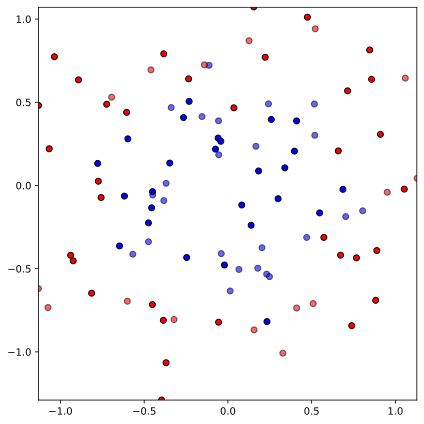

In [17]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu                                      # setting figure color map
cm_bright = ListedColormap(["#FF0000", "#0000FF"])    # setting figure color map

cir_X, cir_y = make_circles(noise=0.2, factor=0.5, random_state=1)
cir_X_train, cir_X_test, cir_y_train, cir_y_test = train_test_split(cir_X, cir_y, test_size=0.4, random_state=42)

x_min, x_max = cir_X[:, 0].min(), cir_X[:, 0].max()
y_min, y_max = cir_X[:, 1].min(), cir_X[:, 1].max()
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.tight_layout()
plt.show()

Here we are going to try three different kinds of classifiers for this task:

- Linear Support Vector Machine (SVM)
- Radial Basis Function (RBF) kernel SVM
- Multi-layer Perceptron (MLP)

Note that our focus is not put on the algorithms, but the process where we utilize these methods.

For more details about practical use of SVM, you can check this [official tutorial provided by Sklearn](https://scikit-learn.org/stable/modules/svm.html). The theoritical details will be covered in class later this semester.

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

lsvc_cls = SVC(kernel="linear", C=0.025)
rbfsvc_cls = SVC(kernel='rbf', gamma=2, C=1)
mlp_cls = MLPClassifier(alpha=1, max_iter=1000)

### Classification with Linear SVM
Check the usage of SVM in Sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

Accuracy for Linear SVM is: 0.4.


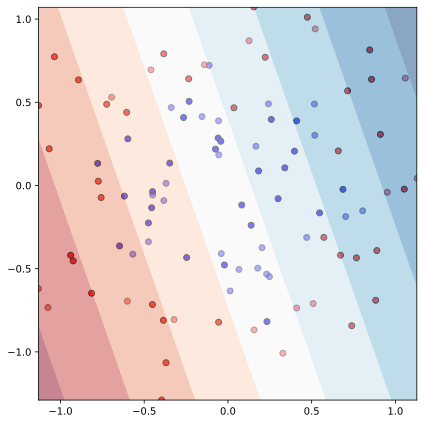

In [19]:
# Plot the dataset first
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

lsvc_cls.fit(cir_X_train, cir_y_train)
score = lsvc_cls.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for Linear SVM is: {score}.")
Z = lsvc_cls.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)

plt.tight_layout()
plt.show()

### Classification with RBF Kernel SVM

Accuracy for RBF kernel SVM is: 0.875.


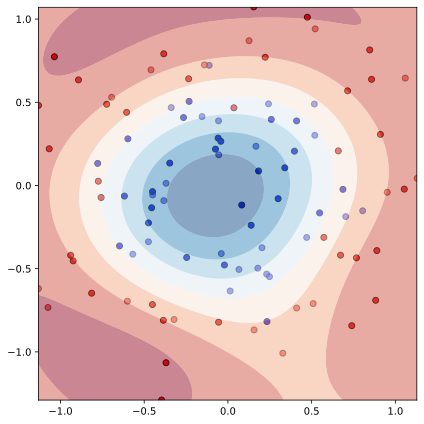

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

rbfsvc_cls.fit(cir_X_train, cir_y_train)
score = rbfsvc_cls.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for RBF kernel SVM is: {score}.")
Z = rbfsvc_cls.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)

plt.tight_layout()
plt.show()

### Classification with MLP
Check the usage of MLP in Sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

Accuracy for MLP is: 0.8.


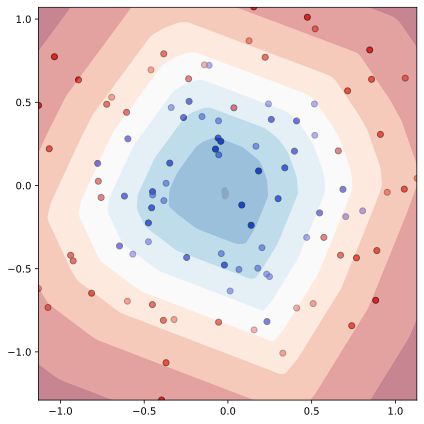

In [21]:
# Plot the dataset first
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

mlp_cls.fit(cir_X_train, cir_y_train)
score = mlp_cls.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for MLP is: {score}.")
Z = mlp_cls.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)

plt.tight_layout()
plt.show()

## Different Data Type & Vectorization

Different tasks naturally come with different data types. It is important to vectorize the input data since the computers don't usually recognize these samples in their original formats. In the case of images, each input sample can be viewed as a 2-D array if we use the grayscale values to present it. For example, in the [digit dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) made up of 1797 8x8 images:

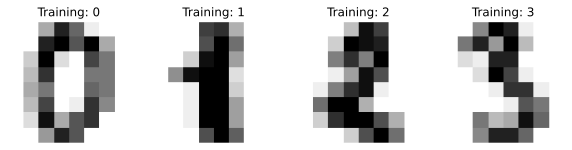

In [22]:
from sklearn import datasets
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

In order to make use of these values, for each sample, we can reshape its grayscale values into a vector (which is a format that our model can easily make use of):

In [23]:
print(image.reshape(-1))
print(f"Vector length: {len(image.reshape(-1))}")

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
Vector length: 64


With these vectors, you can further add any pre-processing pipelines to your system, or do anything you think necessary.

Let's look at another example, text. Suppose we have the following corpus and we want to vectorize these sentences in it:

In [24]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

What can we do? One way to do it is vectorizing these sentences into `one-hot` vectors (see [bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model) for more details on `one-hot` vector in the linguistic settings). During the building of the vectorizer, it comes up with a dictionary first where each word must have shown up in the corpus for at least once. Then the vectors are built by counting the appearance of each word in the dictionary for each sentence.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=False)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


This is obviously a very naive way of vectorization for many reasons, e.g., ignoring word orders.